<a href="https://colab.research.google.com/github/sofipop/Simulaci-n_I/blob/main/Ejercicio_inventarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EJERCICIO SIMULACIÓN DE INVENTARIO

Ejercicio página 84-98 le libro Coss-Bu

Resolviendo siguiendo la metodología para simulación

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Definir las variables

In [3]:
# 1. Definir variables
turno_horas = 8
turno_min = turno_horas * 60
n_camiones = 12
costo_espera_camion = 100  # por hora
salario_hora = {3: 600 / 8, 4: 800 / 8, 5: 1000 / 8, 6: 1200 / 8}
salario_extra_por_hora = {3: 421 / 1, 4: 335 / 1, 5: 165 / 1, 6: 47 / 1}
n_experimentos = 100

##2. Distribución de probabilidad para cada variable

In [5]:
# 2. Determinar distribuciones (método de transformada inversa)
# Tabla 5.14 - Tiempo entre llegadas (minutos)

tiempo_entre_llegadas_dist = [
    (0.00, 0.02, 20), (0.02, 0.10, 25), (0.10, 0.22, 30),
    (0.22, 0.47, 35), (0.47, 0.67, 40), (0.67, 0.82, 45),
    (0.82, 0.92, 50), (0.92, 0.97, 55), (0.97, 1.00, 60)
]

In [6]:
# Tablas 5.15 a 5.18 - Tiempo de servicio según tamaño del equipo
tiempo_servicio_dist = {
    3: [(0.00, 0.05, 20), (0.05, 0.15, 25), (0.15, 0.35, 30), (0.35, 0.60, 35),
        (0.60, 0.72, 40), (0.72, 0.82, 45), (0.82, 0.90, 50), (0.90, 0.96, 55), (0.96, 1.00, 60)],
    4: [(0.00, 0.05, 15), (0.05, 0.20, 20), (0.20, 0.40, 25), (0.40, 0.60, 30),
        (0.60, 0.75, 35), (0.75, 0.87, 40), (0.87, 0.99, 45), (0.99, 1.00, 55)],
    5: [(0.00, 0.10, 10), (0.10, 0.28, 15), (0.28, 0.50, 20), (0.50, 0.66, 25),
        (0.66, 0.82, 30), (0.82, 0.92, 35), (0.92, 0.97, 40), (0.97, 1.00, 45)],
    6: [(0.00, 0.12, 5), (0.12, 0.27, 10), (0.27, 0.53, 15), (0.53, 0.68, 20),
        (0.68, 0.80, 25), (0.80, 0.88, 30), (0.88, 0.94, 35), (0.94, 0.98, 40), (0.98, 1.00, 45)]
}

##3. Modelar las variables aleatorias

In [8]:
# 3. Modelar variables aleatorias
def generar_aleatorio(dist):
    r = np.random.rand()
    for (a, b, val) in dist:
        if a <= r < b:
            return val
    return dist[-1][2]

##4. Definir el modelo del sistema
##5. Diseño del experimento
##6. Repetición del experimento

In [13]:
# 4. Modelo del sistema
def simular_turno(tam_equipo):
    tiempo_actual = 8 * 60  # inicio a las 8:00 AM
    llegadas = []
    tiempos_servicio = []
    tiempo = tiempo_actual

    # generar llegadas
    for _ in range(n_camiones):
        t_llegada = generar_aleatorio(tiempo_entre_llegadas_dist)
        tiempo += t_llegada
        llegadas.append(tiempo)

    tiempo = llegadas[0]
    espera_total = 0
    ociosidad_total = 0
    servicio_final = 0

    for llegada in llegadas:
        if llegada > tiempo:
            ociosidad_total += llegada - tiempo
            tiempo = llegada
        tiempo_servicio = generar_aleatorio(tiempo_servicio_dist[tam_equipo])
        espera_total += max(0, tiempo - llegada)
        tiempo += tiempo_servicio
        servicio_final = tiempo

    # 5. Diseño del experimento
    tiempo_extra = max(0, servicio_final - turno_min)
    salario = salario_hora[tam_equipo] * 8 + salario_extra_por_hora[tam_equipo] * (tiempo_extra / 60)
    costo_espera = espera_total / 60 * costo_espera_camion
    operacion_almacen = 5000 + servicio_final  # ficticio, como en ejemplo

    # 6. Repetir n veces
    return salario + costo_espera + operacion_almacen

##7. Histograma

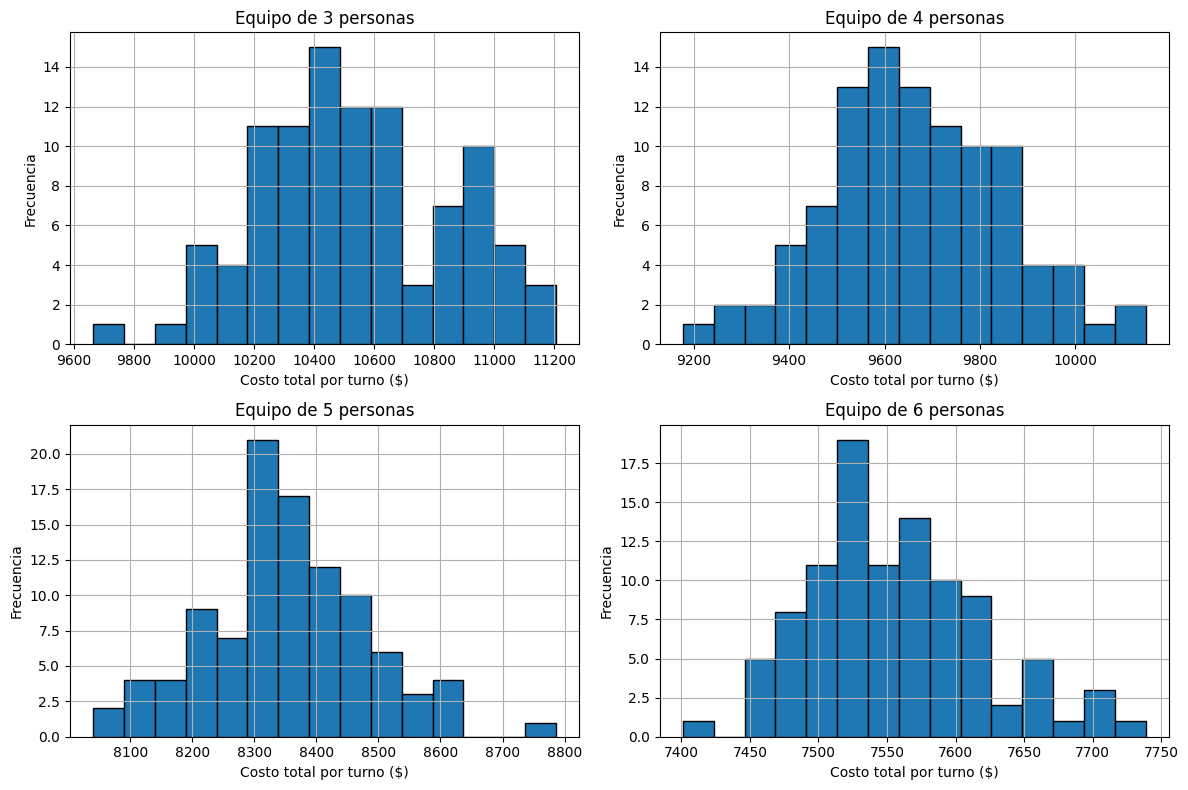

In [11]:
# 7. Obtener histogramas para cada equipo
resultados = {}
for equipo in range(3, 7):
    resultados[equipo] = [simular_turno(equipo) for _ in range(n_experimentos)]

# Graficar
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()
for idx, equipo in enumerate(range(3, 7)):
    axs[idx].hist(resultados[equipo], bins=15, edgecolor='black')
    axs[idx].set_title(f'Equipo de {equipo} personas')
    axs[idx].set_xlabel('Costo total por turno ($)')
    axs[idx].set_ylabel('Frecuencia')
    axs[idx].grid(True)
plt.tight_layout()
plt.show()

## 8. Conclusión

Aquí tenemos los histogramas de la simulación para 100 turnos, comparando el costo total por turno con diferentes tamaños de equipo (3, 4, 5 y 6 personas).
Dónde podemos concluir y observar lo siguiente:
- El equipo de 6 personas tiene menor variabilidad y menor costo promedio.

- El equipo de 3 personas genera mayores costos por espera y tiempo extra.

- Esto confirma lo observado en la tabla 5.21: el tamaño óptimo del equipo para minimizar costos es de 6 personas.